In [1]:
import mxnet as mx
import numpy as np
import os
import pandas as pd
import scipy
from scipy import stats
import skimage.transform as imgtransform

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-17 23:16:50.533886. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [2]:
PRJ = '/workspace/dsbowl2017'
DATA_PATH = os.path.join(PRJ, 'data')
images_folder = os.path.join(DATA_PATH, 'preprocessing_images_spacing211')
patients = [f.replace('.npy', '') for f in os.listdir(images_folder)]

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-17 23:16:54.975146. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [3]:
df_label = pd.read_csv(os.path.join(DATA_PATH, 'stage1_labels.csv'))
df_label

,id,cancer
0,0015ceb851d7251b8f399e39779d1e7d,1
1,0030a160d58723ff36d73f41b170ec21,0
2,003f41c78e6acfa92430a057ac0b306e,0
3,006b96310a37b36cccb2ab48d10b49a3,1
4,008464bb8521d09a42985dd8add3d0d2,1
5,0092c13f9e00a3717fdc940641f00015,0
6,00986bebc45e12038ef0ce3e9962b51a,0
7,00cba091fa4ad62cc3200a657aeb957e,0
8,00edff4f51a893d80dae2d42a7f45ad1,1
9,0121c2845f2b7df060945b072b2515d7,0


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-17 23:16:55.690216. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [4]:
X = np.stack([imgtransform.resize(np.load(os.path.join(images_folder, f + '.npy')),
                                  (32, 64, 64), mode='edge') for f in patients
              if f in df_label.id.values])

X = X.reshape(X.shape[0], 1, X.shape[1], X.shape[2], X.shape[3])

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-17 23:16:58.678206. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [5]:
X.shape

(19, 1, 32, 64, 64)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-17 23:17:14.450379. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [33]:
y = df_label[df_label.id.isin(patients)].cancer.values

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-17 23:44:26.420999. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [34]:
train_iter = mx.io.NDArrayIter(data=X, label=y, batch_size=5, shuffle=True)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-17 23:44:26.821995. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


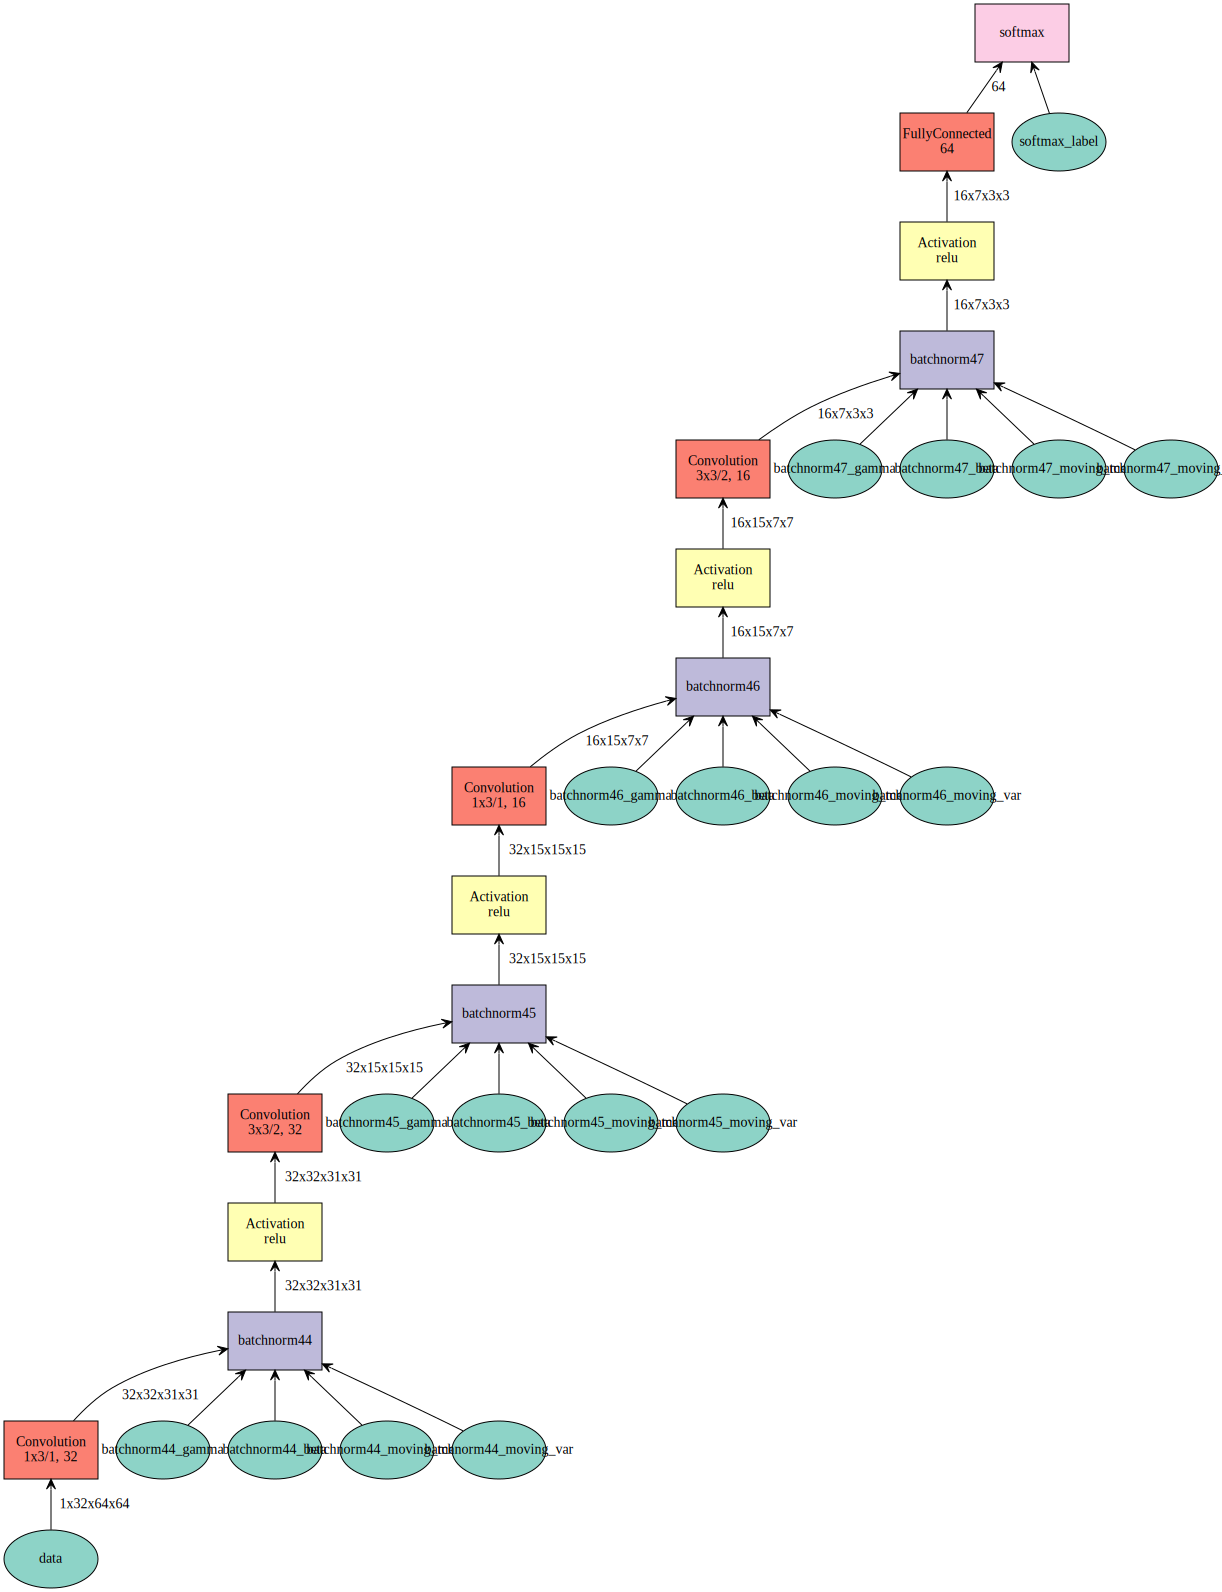

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-17 23:54:33.056021. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [47]:
net = mx.sym.Variable('data')
label = mx.sym.Variable('softmax_label')

net = mx.sym.Convolution(data=net, num_filter=32, kernel=(1, 3, 3), stride=(1, 2, 2))
net = mx.sym.BatchNorm(data=net)
net = mx.sym.Activation(data=net, act_type='relu')
net = mx.sym.Convolution(data=net, num_filter=32, kernel=(3, 3, 3), stride=(2, 2, 2))
net = mx.sym.BatchNorm(data=net)
net = mx.sym.Activation(data=net, act_type='relu')
net = mx.sym.Convolution(data=net, num_filter=16, kernel=(1, 3, 3), stride=(1, 2, 2))
net = mx.sym.BatchNorm(data=net)
net = mx.sym.Activation(data=net, act_type='relu')
net = mx.sym.Convolution(data=net, num_filter=16, kernel=(3, 3, 3), stride=(2, 2, 2))
net = mx.sym.BatchNorm(data=net)
net = mx.sym.Activation(data=net, act_type='relu')
net = mx.sym.FullyConnected(data=net, num_hidden=64)
net = mx.sym.SoftmaxOutput(data=net, name='softmax', label=label)

mx.viz.plot_network(net, shape={'data': X.shape})

In [44]:
import logging

logger = logging.getLogger('mxnet-conv3d')
logger.setLevel(logging.DEBUG)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-17 23:54:04.820611. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [50]:
model = mx.mod.Module(
    symbol = net,       # network structure
    context = mx.cpu(),      # number of data passes for training 
    data_names = ['data'],
    label_names = ['softmax_label']
)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-17 23:54:45.593512. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [ ]:
model.fit(train_iter, 
          optimizer='adam',
          optimizer_params={'learning_rate':0.01},
          eval_metric='acc',
          num_epoch=3)